In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [2]:
# resource = 'https://drive.google.com/uc?export=download&id=1by5_2HhJ4WO5VBJ0Tc9OZStPqDwiAUYW'
resource = 'https://drive.google.com/uc?export=download&id=15tURO14aosIqB2pIc-fJQ_pgHAPM8Ho-'
dataset = pd.read_csv(resource)

## Definir Ponderacion
___

- Ponderaciones asignadas al programa académico de Ingeniería de Sistemas (UP)
  
|Ciencias Naturales|Lectura Crítica|Matemáticas|Sociales y Ciudadanias|Inglés|
|--|--|--|--|--|
|45%|15%|35%|0%|5%| 

## Proceso de Selección
___

- Multiplicacion del ponderado asignado a cada una de las áreas del ICFES 
   de la universidad por el valor de los resultados del Exámen ICFES Saber 11


In [3]:
def selection_process(dataset):
    # Define ponderation
    nature_sciences = 0.45
    critical_reading = 0.15
    maths = 0.35
    sociology = 0
    english = 0.05

    # create sub_dataset 
    columns=['punt_lectura_critica',
            'punt_matematicas',
            'punt_c_naturales',
            'punt_sociales_ciudadanas',
            'punt_ingles',
            'punt_global']

    df = pd.DataFrame(data=dataset,index=None,columns=columns)

    # transform_columns

    df['pond_lectura_critica'] = df['punt_lectura_critica'] * critical_reading
    df['pond_matematicas'] = df['punt_matematicas'] * maths
    df['pond_c_naturales'] = df['punt_c_naturales'] * nature_sciences
    df['pond_sociales_ciudadanas'] = df['punt_sociales_ciudadanas'] * sociology
    df['pond_ingles'] = df['punt_ingles'] * english

    # calculate punt_ponderate



    df['punt_ponderado'] = df.iloc[:,6:10].sum(axis=1)

    # move the last column to penult position
    df_cols = df.columns.tolist()
    df_cols = df_cols[:-7] + df_cols[6:] +  columns[-1:] 


    df = df[df_cols]
    return df #df.sort_values(by=['punt_ponderado','punt_global'], ascending=False)
df = selection_process(dataset)
df.head(5)

,punt_lectura_critica,punt_matematicas,punt_c_naturales,punt_sociales_ciudadanas,punt_ingles,pond_lectura_critica,pond_matematicas,pond_c_naturales,pond_sociales_ciudadanas,pond_ingles,punt_ponderado,punt_global
0,39,32,35,24,36.0,5.85,11.20,15.75,0,1.80,32.80,164
1,41,41,39,44,30.0,6.15,14.35,17.55,0,1.50,38.05,202
2,37,36,33,24,30.0,5.55,12.60,14.85,0,1.50,33.00,162
3,38,42,38,33,37.0,5.70,14.70,17.10,0,1.85,37.50,188
4,58,50,50,53,80.0,8.70,17.50,22.50,0,4.00,48.70,274


### Porcentaje de Seleccion
___
- Para seleccionar un top de 5 puestos, se realiza por cuartiles,
para la cual se tiene que:

|Puesto|%Ponderado|
|--|--|
|1|> 95%|
|2|[63.2% - 95%)|
|3|[55.75% - 63.2%)|
|4|[46.5% - 55.75%)|
|5|[0% - 46.5%)|


#

<AxesSubplot:>

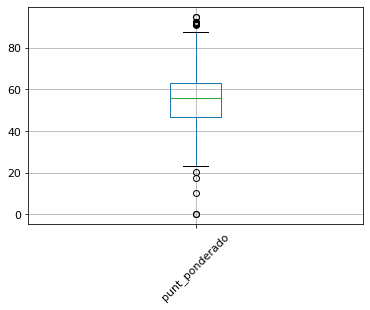

In [56]:
# reglas de negocio
def define_top(df):
    # Clasificar por cuartiles
    df_quantils = df
    q1 = np.quantile(df_quantils.punt_ponderado,0)
    q2 =  np.quantile(df_quantils.punt_ponderado,.25)
    q3 = np.quantile(df_quantils.punt_ponderado,.5)
    q4 = np.quantile(df_quantils.punt_ponderado,.75)
    q5 = np.quantile(df_quantils.punt_ponderado,1)
    df_positions = df.copy()
    #crear un atributo puesto, de acuerdo a los cuartiles
    df_positions['puesto'] = np.where(df_positions.punt_ponderado>=q5,1,
                                np.where((df_positions.punt_ponderado>=q4) & (df_positions.punt_ponderado<q5),2,
                                np.where((df_positions.punt_ponderado>=q3) & (df_positions.punt_ponderado<q4),3,
                                np.where((df_positions.punt_ponderado>=q2) & (df_positions.punt_ponderado<q3),4,
                                np.where((df_positions.punt_ponderado>=q1) & (df_positions.punt_ponderado<q2),5,0)))))
    return df_positions.sort_values(by=['punt_ponderado','punt_global'], ascending=False)


df = selection_process(dataset)
df_positions= define_top(df)
# Grafico de Caja
df_positions.boxplot(column=['punt_ponderado'],
                        return_type='axes', 
                        rot=45, 
                        fontsize=11)

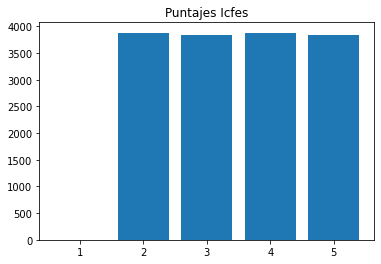

In [510]:
# Plot 
df_positions.columns
x_values = df_positions['puesto'].unique()
freq = df_positions.groupby(df_positions['puesto']).count()
ra = df_positions['puesto'].value_counts().sort_index()
plt.bar(x_values,ra)
plt.title('Puntajes Icfes')
plt.show()

### Estadísticas de Admisión UP
___
- Aplica solo para programa Ing de Sistemas
  - **Notas Aclaratorias**
    - El puntaje corresponde a los obtenidos por los aspirantes en la línea de corte desde el proceso de admisión de __PrimerSemestre 2017__ y __SegundoSemestre 2021__. Estos puntajes de corte no representan los requisitos de inscripción y/o admisión.
    - La información hace referencia a datos estadísticos. Los puntajes de corte para el próximo proceso de admisión pueden variar y depende únicamente de los puntajes de los aspirantes inscritos en cada proceso de admisión.
     


## Regresión Logística
- En estadística, la regresión logística es un tipo de análisis de regresión utilizado para predecir el resultado de una variable categórica (una variable que puede adoptar un número limitado de categorías) en función de las variables independientes o predictoras. Es útil para modelar la probabilidad de un evento ocurriendo en función de otros factores. El análisis de regresión logística se enmarca en el conjunto de Modelos Lineales Generalizados (GLM por sus siglas en inglés) que usa como función de enlace la función logit. En este modelo, las probabilidades que describen los posibles resultados de un solo ensayo se modelan utilizando una función logística.

## Objetivo

- El objetivo es predecir si un aspirante de ICFES Saber 11, puede acceder al programa de Ing de Sistemas en una institución de calidad superior como lo es la Universidad de Pamplona.

### Lectura de Dataset
___

- El dataset histórico, está alimentado por 88 datos, que serán tomados en cuenta 
  para la regresión. 

In [5]:
url = 'https://drive.google.com/uc?export=download&id=1pr_00totvz2Wju-UQnySlieoHnDff1-n'
# https://drive.google.com/file/d/1UzUhyNwxlzksf6L3ownXlHRwNpnvdyeg/view?usp=sharing
# https://docs.google.com/spreadsheets/d/1pr_00totvz2Wju-UQnySlieoHnDff1-n/edit?usp=sharing&ouid=112357711786364972266&rtpof=true&sd=true
historic_up = pd.read_excel(url)

In [39]:
# Dimensión Dataset Histórico
print('Dimensión:',historic_up.shape)
print('Carácteristicas Dataset\n',historic_up.describe())

Dimensión: (284, 1)
Carácteristicas Dataset
        Puntaje Obtenido
count        284.000000
mean          58.096035
std            6.652294
min           32.505000
25%           54.837500
50%           58.200000
75%           62.400000
max           79.600000


In [7]:
# -*- coding: utf-8 -*-
"""
Universidad de Pamplona
Facultad de Ingenierías y Arquitectura
Programa de Ingenieria de Sistemas
#"""

import pandas
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix


In [102]:
# Se crea una lista de nombres para las etiquetas del frame
names=['punt_lectura_critica',
            'punt_matematicas',
            'punt_c_naturales',
            'punt_sociales_ciudadanas',
            'punt_ingles','puesto']
            
# Se crea un data frame
dataset = pd.DataFrame(df_positions,columns=names)

# Se crea un arreglos que contenga solo los valores numericos de la tabla
array = dataset.values
# Las primeras 4 columnas que corresponden a las caracteristica se almacenan en X
X = array[:,0:5]
# La columna 5, que corresponde a la clase, se almacena en Y
Y = array[:,-1]
# historigraba bartplot
X

array([[100., 100., 100.,  78., 100.],
       [100., 100., 100.,  80.,  85.],
       [ 81., 100., 100.,  79.,  85.],
       ...,
       [ 22.,  20.,   0.,  18.,   0.],
       [  0.,   0.,   0.,   0.,  37.],
       [  0.,   0.,   0.,   0.,   0.]])

El porcentaje de acierto es: 0.8743290764390154
[[   0    1    0    0    0]
 [   0 1368    0    0    0]
 [   0  276  959  141    0]
 [   0    0  130 1060  131]
 [   0    0    0    0 1337]]


array([2.])

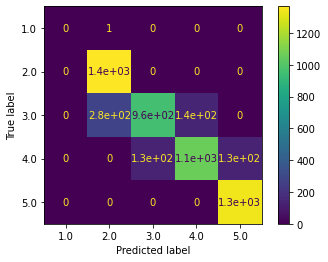

In [86]:
# Se define el tamaño del conjunto de validación, quedando este en 35%
validation_size = 0.35
seed = 10
# Se realiza la división de los datos en los conjuntos de prueba y entrenamiento
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, 
                                    test_size=validation_size, random_state=seed)

 

# Construcción del modelo
LR = LogisticRegression(random_state=0, 
                        solver='liblinear', 
                        multi_class='auto')

# Entrenamiento del modelo
LR.fit(X_train, Y_train)

# Hacer predicciones sobre el conjunto de validacion, independiente de la validacion cruzada
predictions = LR.predict(X_validation)

# Despelgar porcentaje de acierto
print("El porcentaje de acierto es: %s" % accuracy_score(Y_validation, predictions))

# Imprimit matriz de confusión
print(confusion_matrix(Y_validation, predictions))

# Graficar matriz de confusion
plot_confusion_matrix(LR,X_validation, Y_validation)


The accurracy scoring is: 0.9709420692208033
[[   0    1    0    0    0]
 [   0 1368    0    0    0]
 [   0  276  959  141    0]
 [   0    0  130 1060  131]
 [   0    0    0    0 1337]]


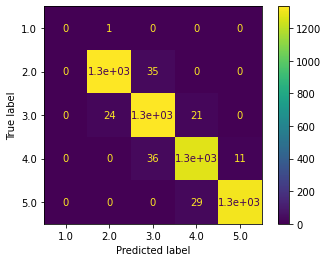

In [92]:
clf = MLPClassifier(activation='relu', max_iter=5200, hidden_layer_sizes=(30,30,30), 
                    learning_rate='adaptive', solver='sgd') 

clf.fit(X,Y)
svm_preditions = clf.predict(X_validation)
print("The accurracy scoring is: %s" % accuracy_score(Y_validation, svm_preditions))
print(confusion_matrix(Y_validation, predictions))

# f1-score
# 0.9643705463182898
# 0.9591880803282229
# 0.9645864824012093
# 0.9946015979270136
# 0.9963290865903692
#0.9954653422586914
#0.982509177283524
plot_confusion_matrix(clf,X_validation, Y_validation)

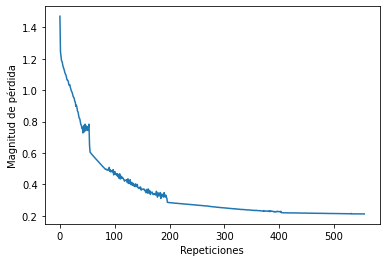

In [93]:
# Plotter Graphics

plt.xlabel("Repeticiones")
plt.ylabel("Magnitud de pérdida")
plt.plot(clf.loss_curve_)
plt.show()

In [94]:
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = Y_validation, clf.predict(X_validation)
print(classification_report(y_true, y_pred))
print()

# Se realiza la división de los datos en los conjuntos de prueba y entrenamiento
# X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, 
#                                     test_size=validation_size, random_state=seed)

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.98      0.97      0.98      1368
         3.0       0.95      0.97      0.96      1376
         4.0       0.96      0.96      0.96      1321
         5.0       0.99      0.98      0.98      1337

    accuracy                           0.97      5403
   macro avg       0.78      0.78      0.78      5403
weighted avg       0.97      0.97      0.97      5403




/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [404]:
historic_up.describe()

,Puntaje Obtenido
count,284.000000
mean,58.096035
std,6.652294
min,32.505000
25%,54.837500
50%,58.200000
75%,62.400000
max,79.600000
